In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
import random
from sklearn import feature_selection
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc,roc_auc_score

In [2]:
IBMData= pd.read_csv('/Users/praanshu/Desktop/SFSU/Python-Isys/Project/IBM_Attrition.csv')

IBMData.drop(['DailyRate','DistanceFromHome','EmployeeCount','EmployeeNumber','MonthlyRate','Over18',
                              'RelationshipSatisfaction','StandardHours'], axis=1, inplace= True)

In [3]:
IBMData.shape  # This dataset has 1470 observations and 27 features.

(1470, 27)

In [4]:
#Getting rid of NA values

IBMData.dropna(axis=0, how='any', inplace = True)

In [5]:
#Change the response variable (Attrition) from categorical to discrete (0s and 1s)'''
'''1- Attrition
    2- No Attrition'''
IBMData['Attrition_discrete']= np.where(IBMData['Attrition'] == 'Yes',1,0)
IBMData['Attrition_discrete'].value_counts() #To find the number of attrited employees

0    1233
1     237
Name: Attrition_discrete, dtype: int64

## Exploratory analysis

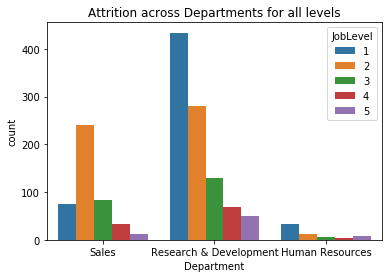

In [6]:
# Using countplot to count the number of attrition in each department keeping Job levels in hue.
# Here we are focusing only on the cases where "Attrition== yes" hence, we used IBMData1.

sns.countplot(x='Department', hue='JobLevel', data=IBMData)
plt.title('Attrition across Departments for all levels')
plt.show()


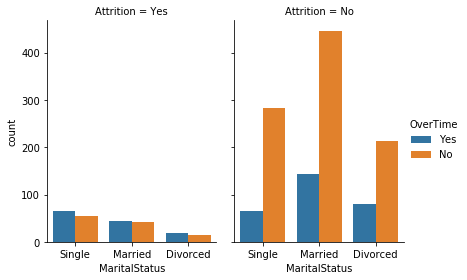

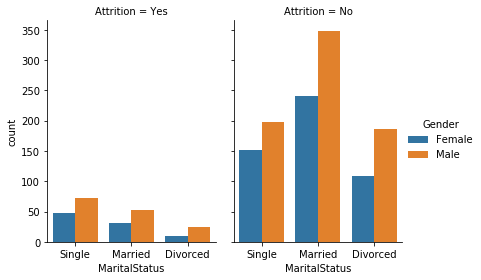

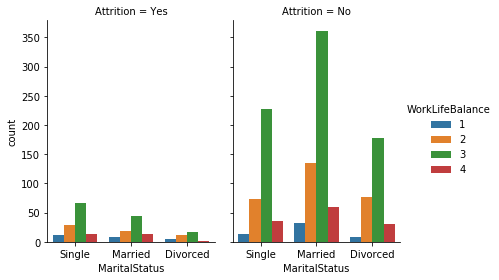

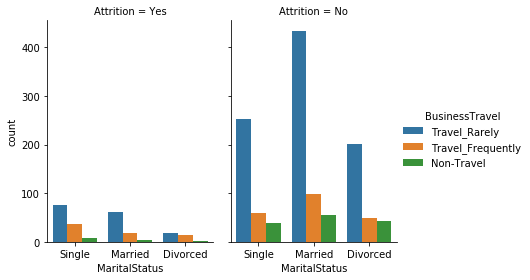

In [7]:
# In the graps below, we specified kind="count" since, we want countplots and col as Attrition.

# Marital Status vs Overtime 
g = sns.catplot(x="MaritalStatus", hue="OverTime", col="Attrition",
                data=IBMData, kind="count",
                height=4, aspect=.7);

# Marital Status vs Gender
g = sns.catplot(x="MaritalStatus", hue="Gender", col="Attrition",
                data=IBMData, kind="count",
                height=4, aspect=.7);

# Marital Status vs Work Life Balance
g = sns.catplot(x="MaritalStatus", hue="WorkLifeBalance", col="Attrition",
                data=IBMData, kind="count",
                height=4, aspect=.7);

# Marital Status vs Business Travel
g = sns.catplot(x="MaritalStatus", hue="BusinessTravel", col="Attrition",
                data=IBMData, kind="count",
                height=4, aspect=.7);

### The exploratory analysis suggests that among single people, the ones who work overtime are more likely to attrite. Among the singles, males have a higher propensity to attrite than females.

In [8]:
#To create dummy variables from categorical variables

categorical= ['JobInvolvement','JobLevel','WorkLifeBalance','JobRole','MaritalStatus','BusinessTravel',
              'Department','EducationField','OverTime','Education',
              'EnvironmentSatisfaction','Gender','JobSatisfaction','PerformanceRating'] # These need to be converted to dummy

for var in categorical:
    
    categorical_list = pd.get_dummies(IBMData[var], prefix=var,drop_first=True) #to get k-1 dummy variables
    IBMData = pd.concat([IBMData, categorical_list], axis=1)   

IBMData_Vars=IBMData.columns.values.tolist()  #Creating a list to run a for loop

to_keep=[i for i in IBMData_Vars if i not in categorical] # to remove the headings of JobRole and MaritalStatus
                                                            #as dummy vars have been created now

IBMData_final=IBMData[to_keep]
IBMData_final.drop(['Attrition'],axis=1,inplace =True)
IBMData_final.head()

/Users/praanshu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Age,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,Education_4,Education_5,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,PerformanceRating_4
0,41,94,5993,8,11,0,8,0,6,4,...,0,0,1,0,0,0,0,0,1,0
1,49,61,5130,1,23,1,10,3,10,7,...,0,0,0,1,0,1,1,0,0,1
2,37,92,2090,6,15,0,7,3,0,0,...,0,0,0,0,1,1,0,1,0,0
3,33,56,2909,1,11,0,8,3,8,7,...,1,0,0,0,1,0,0,1,0,0
4,27,40,3468,9,12,1,6,3,2,2,...,0,0,0,0,0,1,1,0,0,0


In [9]:
ListAllVariables = IBMData_final.columns.values
X= IBMData_final[ListAllVariables]
del X['Attrition_discrete']

y= IBMData_final['Attrition_discrete']


### Using statsmodels.api for logistic regression

In [14]:
X['Intercept'] = 1

# Splitting data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.33, random_state=24)

lm = smf.Logit(y_train, X_train)
result = lm.fit()
result.summary()

         Current function value: 0.261005
         Iterations: 35


/Users/praanshu/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Attrition_discrete   No. Observations:                  984
Model:                          Logit   Df Residuals:                      929
Method:                           MLE   Df Model:                           54
Date:                Wed, 25 Nov 2020   Pseudo R-squ.:                  0.4031
Time:                        14:08:14   Log-Likelihood:                -256.83
converged:                      False   LL-Null:                       -430.24
                                        LLR p-value:                 2.341e-44
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0421      0.017     -2.414      0.016      -0.076      -0.008
HourlyRate                            0.0074      0.006      1.237      0.216      -0.004       0.019
MonthlyIncome                     -5.468e-05      0.000     -0.436      0.663      -0.000       0.000
NumCompaniesWorked                    0.1633      0.053      3.108      0.002       0.060       0.266
PercentSalaryHike                     0.0254      0.051      0.497      0.619      -0.075       0.126
StockOptionLevel                     -0.0220      0.202     -0.109      0.913      -0.417       0.373
TotalWorkingYears                    -0.0495      0.037     -1.329      0.184      -0.122       0.023
TrainingTimesLastYear                -0.2705      0.098     -2.754      0.006      -0.463      -0.078
YearsAtCompany                        0.0060      0.052      0.114      0.909      -0.097       0.109
YearsInCurrentRole                   -0.1180      0.064     -1.855      0.064      -0.243       0.007
YearsSinceLastPromotion               0.2213      0.056      3.959      0.000       0.112       0.331
YearsWithCurrManager                 -0.0710      0.062     -1.140      0.254      -0.193       0.051
JobInvolvement_2                     -1.5067      0.479     -3.146      0.002      -2.445      -0.568
JobInvolvement_3                     -1.6716      0.450     -3.717      0.000      -2.553      -0.790
JobInvolvement_4                     -1.9573      0.593     -3.302      0.001      -3.119      -0.796
JobLevel_2                           -1.3796      0.619     -2.231      0.026      -2.592      -0.167
JobLevel_3                            0.2902      1.008      0.288      0.773      -1.685       2.266
JobLevel_4                           -1.5346      1.763     -0.870      0.384      -4.991       1.922
JobLevel_5                            2.4124      2.148      1.123      0.261      -1.797       6.622
WorkLifeBalance_2                    -1.0446      0.491     -2.129      0.033      -2.006      -0.083
WorkLifeBalance_3                    -1.3743      0.460     -2.987      0.003      -2.276      -0.473
WorkLifeBalance_4                    -1.2296      0.584     -2.107      0.035      -2.374      -0.086
JobRole_Human Resources              19.9507   2.12e+04      0.001      0.999   -4.15e+04    4.15e+04
JobRole_Laboratory Technician         1.7579      0.905      1.942      0.052      -0.016       3.532
JobRole_Manager                       0.5778      1.513      0.382      0.702      -2.387       3.543
JobRole_Manufacturing Director        0.7157      0.864      0.829      0.407      -0.977       2.408
JobRole_Research Director            -0.8511      1.549     -0.549      0.583      -3.887       2.185
JobRole_Research Scientist            0.8320      0.901      0.924      0.356      -0.933       2.597
JobRole_Sales Executive               3.7545      1.674      2.243      0.025  

### Based on the results from statsmodels.api, we should exclude the following features due to insignificant pvalues:
##### Hourly Rate
##### MonthlyIncome
##### PercentSalaryHike
##### StockOption
##### TotalWorkingYears
##### YearsAtCompany
##### YearsInCurrentRole
##### YearsWithCurrentManager
##### JobLevel (all dummies will be excluded since 3 are insignificant)
##### Job Role
##### Department 
##### Education Field
##### Education
##### Job Satisfaction (exclude all since 2 are insignificant)
##### PerformanceRating (Our data had only two values of performance rating for all employees, so data may not be accurate)


### Interpretation

We see that with a unit increase in Age, the odds of attrition decrease by 4% 
With a unit increase in Num of companies worked, the odds of attrition increase by 16%, suggesting that employees having worked for more companies are more likely to attrite. 

The result also suggests that training is a positive factor in retention as with a unit increase in training, the odds of attrition decrease by 21%. Similarly, deductions can be made about all the statistically significant features

### We will now use sklearn and CV to tune our model

In [ ]:
X.drop(['Intercept'], axis=1, inplace = True)

In [17]:
# Splitting data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.33, random_state=24)
lm_scikit = LogisticRegression(solver = 'liblinear', max_iter = 10000)

print("Accuracy with 10 fold CV for liblinear is %f" %cross_val_score(lm_scikit, X_train , y_train, cv=10, scoring = 'accuracy').mean())

Accuracy with 10 fold CV for liblinear is 0.886236


In [19]:

lm_scikit.fit(X_train, y_train)


y_hat_liblinear = lm_scikit.predict(X_test)
print(confusion_matrix(y_test, y_hat_liblinear))

[[392  13]
 [ 54  27]]


In [27]:
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

NameofVariables= ['Age','TrainingTimesLastYear', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
                 'YearsWithCurrManager','HourlyRate','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike',
                 'TotalWorkingYears']
for i in NameofVariables:
    IBMData_final[i] = Standardize(IBMData_final[i])


IBMData_final   


/Users/praanshu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Age,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,Education_4,Education_5,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,PerformanceRating_4
0,0.547619,0.914286,0.262454,0.888889,0.000000,0,0.200,0.000000,0.150,0.222222,...,0,0,1,0,0,0,0,0,1,0
1,0.738095,0.442857,0.217009,0.111111,0.857143,1,0.250,0.500000,0.250,0.388889,...,0,0,0,1,0,1,1,0,0,1
2,0.452381,0.885714,0.056925,0.666667,0.285714,0,0.175,0.500000,0.000,0.000000,...,0,0,0,0,1,1,0,1,0,0
3,0.357143,0.371429,0.100053,0.111111,0.000000,0,0.200,0.500000,0.200,0.388889,...,1,0,0,0,1,0,0,1,0,0
4,0.214286,0.142857,0.129489,1.000000,0.071429,1,0.150,0.500000,0.050,0.111111,...,0,0,0,0,0,1,1,0,0,0
5,0.333333,0.700000,0.108425,0.000000,0.142857,0,0.200,0.333333,0.175,0.388889,...,0,0,0,0,1,1,0,0,1,0
6,0.976190,0.728571,0.087467,0.444444,0.642857,3,0.300,0.500000,0.025,0.000000,...,0,0,0,1,0,0,0,0,0,1
7,0.285714,0.528571,0.088678,0.111111,0.785714,1,0.025,0.333333,0.025,0.000000,...,0,0,0,0,1,1,0,1,0,1
8,0.476190,0.200000,0.448499,0.000000,0.714286,0,0.250,0.333333,0.225,0.388889,...,0,0,0,0,1,1,0,1,0,1
9,0.428571,0.914286,0.222643,0.666667,0.142857,2,0.425,0.500000,0.175,0.388889,...,0,0,0,1,0,1,0,1,0,0


In [29]:
ListAllVariables = IBMData_final.columns.values
X= IBMData_final[ListAllVariables]
del X['Attrition_discrete']

y= IBMData_final['Attrition_discrete']

In [30]:
# Splitting data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.33, random_state=24)

#### Using 10-fold cross validation to find the best tuning parameter - C using 'liblinear' and l1 penalty


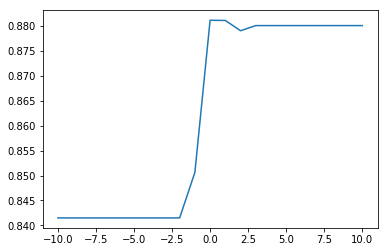

Our optimal C is 1.000000
Our accuracy at optimal C is 0.881154


In [31]:

c_list = np.logspace(-10,10,21) 
c_index = np.linspace(-10,10,21)

cv_scores = []
for c_score in c_list:
    lm_scikit = LogisticRegression(C = c_score,  solver = 'liblinear', max_iter  = 10000, penalty = 'l1')
    cv_scores.append(cross_val_score(lm_scikit, X_train, y_train,cv = 10, scoring = 'accuracy').mean())

plt.plot(c_index, cv_scores)
plt.show()

print("Our optimal C is %f" %c_list[np.argmax(cv_scores)])   
print("Our accuracy at optimal C is %f" %np.max(cv_scores))

### Localising search

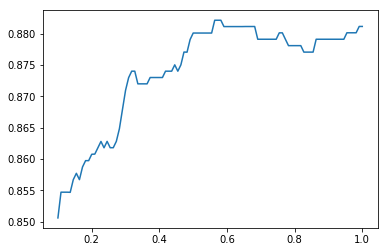

Our optimal C is 0.563636
Our accuracy at optimal C is 0.882144


In [34]:
c_list = np.linspace(0.1,1,100) 
cv_scores = []
for c_score in c_list:
    lm_scikit = LogisticRegression(C = c_score,  solver = 'liblinear', max_iter  = 10000, penalty = 'l1')
    cv_scores.append(cross_val_score(lm_scikit, X_train, y_train,cv = 10, scoring = 'accuracy').mean())

plt.plot(c_list, cv_scores)
plt.show()

print("Our optimal C is %f" %c_list[np.argmax(cv_scores)])   
print("Our accuracy at optimal C is %f" %np.max(cv_scores))

In [36]:
lm_scikit = LogisticRegression(C = 0.563636,  solver = 'liblinear', max_iter  = 50000, penalty = 'l1')
lm_scikit.fit(X_train,y_train)
Var_coef = zip(lm_scikit.coef_[0,:],X.columns.values)
print(list(Var_coef))

[(-1.0305413333932298, 'Age'), (0.09044171861824958, 'HourlyRate'), (-0.6896688748960722, 'MonthlyIncome'), (0.75256822047473, 'NumCompaniesWorked'), (0.0, 'PercentSalaryHike'), (-0.14906982191919027, 'StockOptionLevel'), (-0.8711540222919132, 'TotalWorkingYears'), (-0.8235392457301617, 'TrainingTimesLastYear'), (0.0, 'YearsAtCompany'), (-0.7994894953490798, 'YearsInCurrentRole'), (1.1448077780987946, 'YearsSinceLastPromotion'), (-0.6214874187126762, 'YearsWithCurrManager'), (-0.3528223878634022, 'JobInvolvement_2'), (-0.6002266734229462, 'JobInvolvement_3'), (-0.7033882915998527, 'JobInvolvement_4'), (-1.21095819798312, 'JobLevel_2'), (-0.07303724575854673, 'JobLevel_3'), (-0.9303923820836381, 'JobLevel_4'), (0.0, 'JobLevel_5'), (0.0, 'WorkLifeBalance_2'), (-0.2772780594903754, 'WorkLifeBalance_3'), (-0.05203439180272726, 'WorkLifeBalance_4'), (0.0, 'JobRole_Human Resources'), (0.7470973624179021, 'JobRole_Laboratory Technician'), (0.0, 'JobRole_Manager'), (0.0, 'JobRole_Manufacturing

### Based on scikit learn and model tuning using CV, we should eliminate the following variables:
#### PercentSalaryHike
#### YearsAtCOmpany
#### JobRole (as most of its dummies are 0)
#### Education (as most of its dummies are 0)

In [37]:
X.drop(['PercentSalaryHike','YearsAtCompany','JobRole_Human Resources','JobRole_Laboratory Technician',
       'JobRole_Manager','JobRole_Manufacturing Director','JobRole_Research Director','JobRole_Research Scientist',
       'JobRole_Sales Executive','JobRole_Sales Representative','Education_2','Education_3','Education_4',
       'Education_5'], axis=1, inplace = True)

X.head()

,Age,HourlyRate,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,...,EducationField_Technical Degree,OverTime_Yes,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,PerformanceRating_4
0,0.547619,0.914286,0.262454,0.888889,0,0.200,0.0,0.222222,0.000000,0.294118,...,0,1,1,0,0,0,0,0,1,0
1,0.738095,0.442857,0.217009,0.111111,1,0.250,0.5,0.388889,0.066667,0.411765,...,0,0,0,1,0,1,1,0,0,1
2,0.452381,0.885714,0.056925,0.666667,0,0.175,0.5,0.000000,0.000000,0.000000,...,0,1,0,0,1,1,0,1,0,0
3,0.357143,0.371429,0.100053,0.111111,0,0.200,0.5,0.388889,0.200000,0.000000,...,0,1,0,0,1,0,0,1,0,0
4,0.214286,0.142857,0.129489,1.000000,1,0.150,0.5,0.111111,0.133333,0.117647,...,0,0,0,0,0,1,1,0,0,0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.33, random_state=24)
lr1= LogisticRegression(solver = 'liblinear', max_iter=10000)
lr1.fit(X_train,y_train)

print("Accuracy with 10 fold CV for liblinear is %f" %cross_val_score(lr1, X_train , y_train, cv=10, scoring = 'accuracy').mean())

Accuracy with 10 fold CV for liblinear is 0.887246


[[393  12]
 [ 54  27]]
0.814327084285932


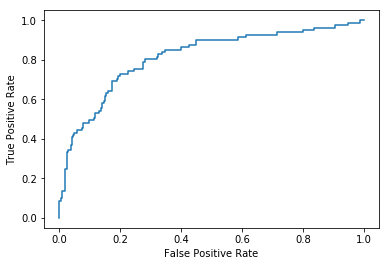

In [46]:
print(confusion_matrix(y_test, y_pred))

y_hat_probability = lr1.predict_proba(X_test).T[1]  #T[1] returns probability of belonging to class
print(roc_auc_score(y_test, y_hat_probability))
vals = roc_curve(y_test, y_hat_probability)

plt.plot(vals[0], vals[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()